# Disjointification Example

- Demonstrates feature selection through disjointification
- Data is an example of gene expression on patients

## defs/imports/loads

In [1]:
import disjointification
from disjointification import load_gene_expression_data, Disjointification
from pathlib import Path
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
load_last_save_point = False

# shrink the dataset for debugging
select_num_features = 0.5
select_num_instances = 0.5
alert_selection = True
debug_print = False
model_save_folder = r"c:\model"
last_save_point = r"model\06_24_2023__10_58_52\06_24_2023__10_59_03_(3069, 9260).pkl"
alert_selection = True

In [3]:
if load_last_save_point:
    test = disjointification.from_file(last_save_point)
else:
    if 'labels_df' not in locals() or 'features_df' not in locals():
        print(f"Dataframes not loaded. Loading.")
        ge_data = load_gene_expression_data()
        features_df = ge_data["features"]
        labels_df = ge_data["labels"]
        print(f"features_df loaded with shape {features_df.shape}")
        print(f"labels_df loaded with shape {labels_df.shape}")
    test = Disjointification(features_file_path=None, labels_file_path=None, features_df=features_df, labels_df=labels_df, select_num_features=select_num_features, select_num_instances=select_num_instances, root_save_folder=model_save_folder, do_set=False, alert_selection=alert_selection)
    test.set()
test.describe()

Dataframes not loaded. Loading.
features_df loaded with shape (3069, 9266)
labels_df loaded with shape (3069, 8)
saving model...
saved model to C:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl
Disjointification Test Description
features data: (1534, 4630)
labels data: (1534, 2)
last save point: c:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl


In [4]:
last_save_point = test.last_save_point_file
print('last save point:')
print(last_save_point)
test = disjointification.from_file(last_save_point)

last save point:
c:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl


In [5]:
test.describe()

Disjointification Test Description
features data: (1534, 4630)
labels data: (1534, 2)
last save point: c:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl


In [6]:
min_num_of_features = 500
correlation_threshold = 0.7

force_corr= True
do_corr = np.any([force_corr, test.features_selected_in_disjointification_lin in [None,[]], test.features_selected_in_disjointification_log in [None,[]]])

if do_corr:    
    start_time = disjointification.utils.get_dt_in_fmt()
    print(f"{start_time} Running Disjointificatioin")
    test.run_disjointification(min_num_of_features=min_num_of_features, correlation_threshold=correlation_threshold)

pprint(f"features selected in disjointification lin: \n{test.features_selected_in_disjointification_lin}")
pprint(f"features selected in disjointification log: \n{test.features_selected_in_disjointification_log}")

06_24_2023__17_51_55 Running Disjointificatioin
saving model...
saved model to C:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl
saving model...
saved model to C:\model\06_24_2023__17_51_51\06_24_2023__17_51_51.pkl
('features selected in disjointification lin: \n'
 "['LCK', 'ETS1', 'APBB1IP', 'FCRL2', 'BTN3A1', 'CLEC10A', 'IRF1', 'FCER2', "
 "'BCL2A1', 'FXYD2', 'LAIR2', 'KLRC1', 'CASP10', 'IL15', 'GPR25', 'FNBP1', "
 "'DEF6', 'IFNAR2', 'CASP4', 'APOBEC3C', 'CMKLR1', 'FOXN2', 'CXCL13', 'GBP2', "
 "'CAMK4', 'DUSP2', 'CCL13', 'MATK', 'CCL4', 'CSK', 'IL7', 'CCL17', 'CRLF3', "
 "'CHST2', 'MAP3K14', 'ELMO1', 'CD101', 'CYTH1', 'ARAP2', 'CXCR4', 'CCL22', "
 "'GMIP', 'ITM2C', 'IL1R2', 'HLA-DQB1', 'FXYD7', 'IL21', 'BATF3', 'ADA', "
 "'C1orf54', 'F5', 'DPYD', 'ADCY7', 'LBR', 'ACHE', 'DAPP1', 'ASGR2', 'C2', "
 "'IL10', 'ARHGEF1', 'ISG20', 'BCL2L14', 'ITIH1', 'CEACAM21', 'BCL11A', "
 "'IL9R', 'C3', 'CCDC88A', 'ANKRD55', 'ICAM1', 'ESR2', 'EAF2', 'IRF5', 'CD83', "
 "'CDHR1', 'CD160', 'LBH', 'FAS

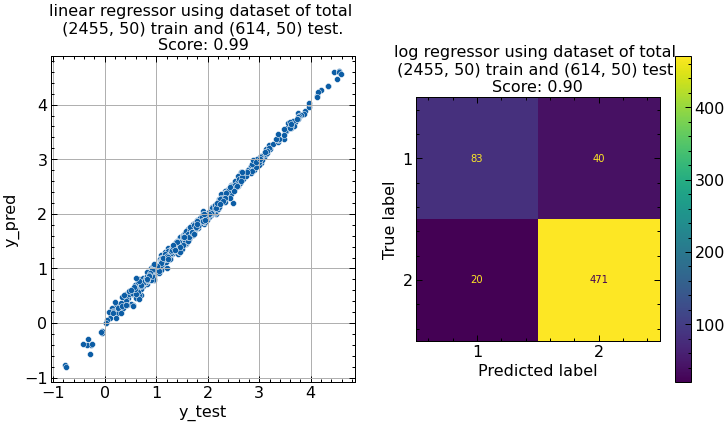

In [11]:
test.run_regressions()
test.show()

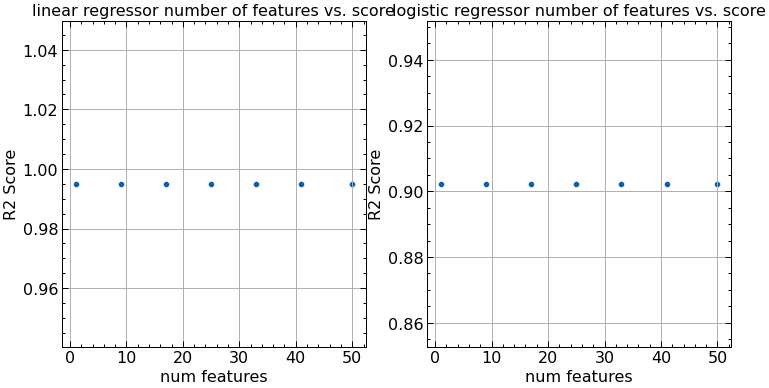

In [12]:
test.sweep_regression()
test.show_regressor_sweep()

In [ ]:
# TODOS

# VISUALIZE
# RANDOMFOR

In [ ]:
test.features_df[test.features_already_selected_lin].shape

## Meeting 24/05

- Disjointification should be done - 
- RF + Lasso benchmark
- Let's try OOB solutions - genetic?
- Propose other methods ? 
- RFE
- Can test another method that'll reduce to 500 and then do the same
